In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob
#from tqdm import tqdm

In [3]:
chessboard_size = (9,6)

In [4]:
#Define arrays to save detected points from the chessboard
obj_points = [] #3D points in real world  
img_points = [] #3D points in image

In [5]:
#Prepare grid and points to display
objp = np.zeros((np.prod(chessboard_size),3),dtype=np.float32) # Array of 54,3 zeros
objp[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

In [6]:
calib_path = glob.glob("../opencv-np-workshop/data/calib/*")

In [7]:
for img_path in calib_path:
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(img_gray, chessboard_size, None)
    
    if ret:
        print("Chessboard detected")
        print(img_path)
        #define criteria for subpixel accuracy
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        #refine corner location (to subpixel accuracy) based on criteria.
        corners = cv2.cornerSubPix(img_gray, corners, (11,11), (-1,-1), criteria)
        obj_points.append(objp)
        img_points.append(corners)
        

Chessboard detected
../opencv-np-workshop/data/calib\P2280001.JPG
Chessboard detected
../opencv-np-workshop/data/calib\P2280002.JPG
Chessboard detected
../opencv-np-workshop/data/calib\P2280003.JPG
Chessboard detected
../opencv-np-workshop/data/calib\P2280004.JPG
Chessboard detected
../opencv-np-workshop/data/calib\P2280005.JPG
Chessboard detected
../opencv-np-workshop/data/calib\P2280006.JPG
Chessboard detected
../opencv-np-workshop/data/calib\P2280007.JPG
Chessboard detected
../opencv-np-workshop/data/calib\P2280008.JPG


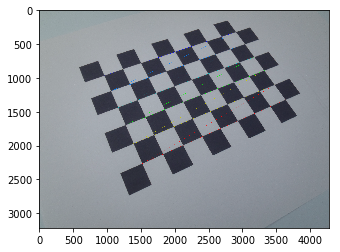

In [27]:
show_img = img.copy()
cv2.drawChessboardCorners(show_img,(9,6), corners, True)
plt.imshow(show_img)

In [9]:
#Calibrate camera
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(
                                                obj_points, 
                                                img_points,
                                                img_gray.shape[::-1], 
                                                None, 
                                                None
                                                )

In [17]:
# Refine the camera matrix
h, w = img_gray.shape
K_opt, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w,h), 1, (w,h))

In [15]:
K

array([[3.57276978e+03, 0.00000000e+00, 2.11492730e+03],
       [0.00000000e+00, 3.58000354e+03, 1.69882805e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [22]:
# undistort
undistorted = cv2.undistort(img, K, dist, None, K_opt)

In [23]:
# crop the image
x, y, w, h = roi
undistorted = undistorted[y:y+h, x:x+w]

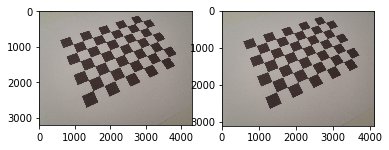

In [24]:
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(undistorted[:,:,::-1])

In [31]:
# Measure calibration error
mean_error = 0
for i in range(len(obj_points)):
    img_points2, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], K, dist)
    error = cv2.norm(img_points[i], img_points2, cv2.NORM_L2)/len(img_points2)
    mean_error += error
print( "total error: {}".format(mean_error/len(obj_points)) )


total error: 0.1264159553783108


In [32]:
#Save parameters into numpy file
np.save("../opencv-np-workshop/data/camera_params/K", K_opt)
#np.save("../opencv-np-workshop/data/camera_params/ret", ret)
#np.save("../opencv-np-workshop/data/camera_params/dist", dist)
#np.save("../opencv-np-workshop/data/camera_params/rvecs", rvecs)
#np.save("../opencv-np-workshop/data/camera_params/tvecs", tvecs)